In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [6]:
SGD = keras.optimizers.legacy.SGD(learning_rate=0.1, momentum=0.0, nesterov=True)
Adam = keras.optimizers.legacy.Adam()

In [12]:
model = keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(28, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=SGD,
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [15]:
model.fit(x_train, y_train_cat, batch_size=64, epochs=4, validation_split=0.2)

Epoch 1/4
750/750 [==============================] - 6s 8ms/step - loss: 0.3031 - accuracy: 0.9164 - val_loss: 0.2905 - val_accuracy: 0.9184
Epoch 2/4
750/750 [==============================] - 6s 8ms/step - loss: 0.2996 - accuracy: 0.9159 - val_loss: 0.2976 - val_accuracy: 0.9197
Epoch 3/4
750/750 [==============================] - 6s 8ms/step - loss: 0.3043 - accuracy: 0.9143 - val_loss: 0.2922 - val_accuracy: 0.9184
Epoch 4/4
750/750 [==============================] - 6s 8ms/step - loss: 0.3070 - accuracy: 0.9134 - val_loss: 0.2961 - val_accuracy: 0.9203


In [14]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 2s 7ms/step - loss: 0.2937 - accuracy: 0.9199


[0.2937246561050415, 0.9199000000953674]

1/1 [==============================] - 0s 17ms/step
Number: 7


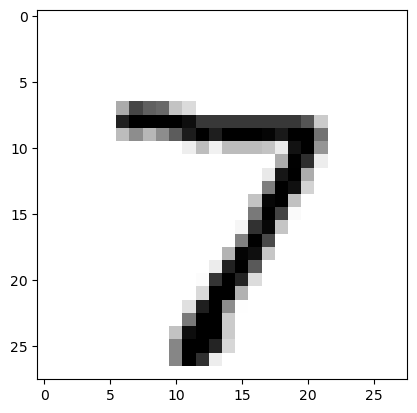

In [169]:
n = 0
x = np.expand_dims(x_test[n], axis=0)
result = model.predict(x)
print(f'Number: {np.argmax(result)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)